# **Artificial Neural Network**

## **Importing the libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

## **Importing the dataset**


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MyCode_DeepLearning/email_dataset.csv")
print(data.shape)
print(data.head())

(5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None


In [ ]:
X = data.iloc[:,3:-1].values
Y =data.iloc[:,-1].values

In [ ]:
print(X)

[[ 1  0  0 ...  0  0  0]
 [24  6  6 ...  0  1  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 1  1  0 ...  0  0  0]
 [ 1  0  2 ...  0  1  0]
 [ 5  1  6 ...  0  0  0]]


In [ ]:
print(Y)

[0 0 0 ... 1 1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 32)

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)
x_train

array([[-0.82565569, -0.46711656, -0.34322878, ..., -0.06032421,
        -0.33993753, -0.07652148],
       [ 1.21115861, -0.46711656, -0.34322878, ..., -0.06032421,
        -0.33993753, -0.07652148],
       [-0.82565569, -0.46711656, -0.34322878, ..., -0.06032421,
        -0.33993753, -0.07652148],
       ...,
       [ 1.21115861, -0.46711656, -0.34322878, ..., -0.06032421,
        -0.33993753, -0.07652148],
       [ 1.21115861, -0.46711656, -0.34322878, ..., -0.06032421,
        -0.33993753, -0.07652148],
       [-0.82565569, -0.46711656,  2.91350856, ..., -0.06032421,
        -0.33993753, -0.07652148]])

# **Building the ANN**


In [ ]:
ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ANN.compile(optimizer =tf.keras.optimizers.Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
ANN.fit(x_train,y_train, batch_size= 32, epochs=100)


Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8367 - loss: 0.3330
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.0270
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0198
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9927 - loss: 0.0183
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9966 - loss: 0.0125
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9902 - loss: 0.0225
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9981 - loss: 0.0037
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0183
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0060
Epoch 10/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9972 - loss: 0.0081
Epoch 11/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9975 - loss: 0.0059
Epoch 12/100
130/130 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
prediction = ANN.predict(x_test)
ANN.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9682 - loss: 0.3275


[0.3671605885028839, 0.9748792052268982]

In [ ]:
ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │         305,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,036,805 (3.96 MB)

 Trainable params: 345,601 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 691,204 (2.64 MB)

In [ ]:
loss, accuracy = ANN.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.3275
Model loss on test set: 0.3671605885028839
Model accuracy on test set: 97.49%


In [ ]:
def make_confusion_matrix(y_true, y_preds,figsize=(10, 10), text_size=15):
# Create the confusion matrix to binary classification
    cm = confusion_matrix(y_test, tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

# Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

# Create classes
    classes = False

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

# Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes),
            yticks=np.arange(n_classes),
            xticklabels=labels,
            yticklabels=labels)

# Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

# Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

# Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                  horizontalalignment="center",
                  color="white" if cm[i, j] > threshold else "black",
                  size=text_size)

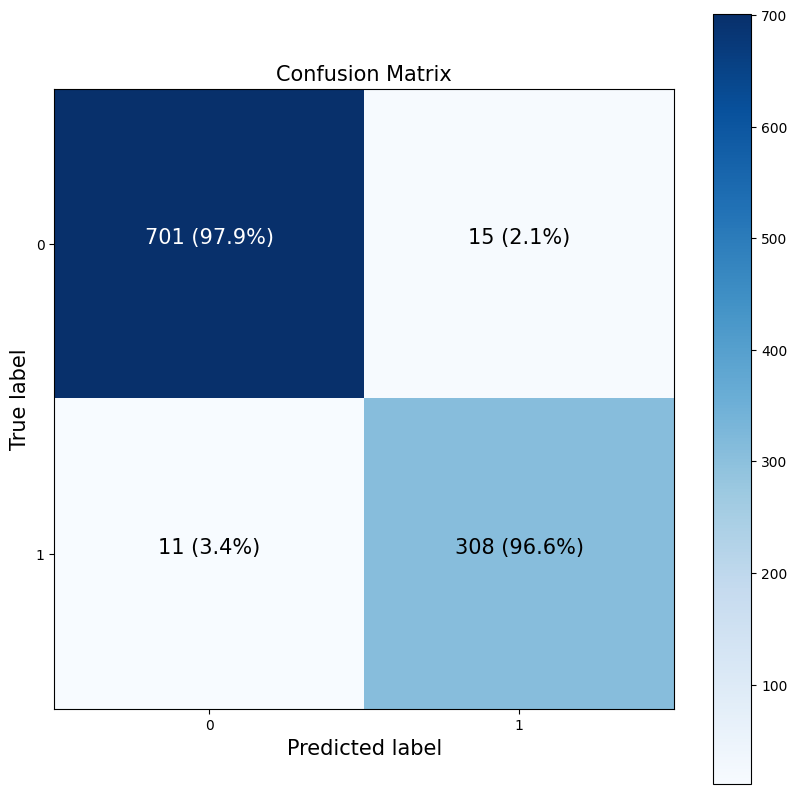

In [ ]:
make_confusion_matrix(y_test, tf.round(prediction),figsize=(10, 10), text_size=15)